# 2.2. 데이터전처리

In [ ]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [ ]:
import numpy as np

In [ ]:
np.column_stack(([1,2,3], [4,5,6]))
# 두가지 리스트를 컬럼 기준으로 쌓고자한다면 column_stack 사용하면 된다

array([[1, 4],
       [2, 5],
       [3, 6]])

In [ ]:
fish_data = np.column_stack((fish_length, fish_weight))

In [ ]:
print(fish_data[:5])

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


In [ ]:
# 만약 1, 0 가지의 데이터를 만들어야 한다면? np.ones(), np.zeros() 사용하면 된다
print(np.ones(5))

[1. 1. 1. 1. 1.]


In [ ]:
fish_target = np.concatenate((np.ones(35), np.zeros(14)))

In [ ]:
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


In [ ]:
# 사이킷런으로 훈련/테스트셋 나누기
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(fish_data, fish_target, random_state = 1223)

In [ ]:
print(X_train.shape, X_test.shape)

(36, 2) (13, 2)


In [ ]:
print(y_train.shape, y_test.shape)

(36,) (13,)


In [ ]:
print(y_test)
# 13개 셋 중에서 7개가 도미, 6개가 방어

[0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1.]


In [ ]:
# stratify를 사용하면, target 샘플 분포를 골고루 섞을 수 있음
X_train, X_test, y_train, y_test = train_test_split(fish_data, fish_target, stratify = fish_target, random_state = 1223)

In [ ]:
print(y_test) # 9개는 도미, 7개는 방어

[0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1.]


In [ ]:
# 수상한 도미 한마리!~

In [ ]:
from sklearn.neighbors import KNeighborsClassifier 
kn = KNeighborsClassifier()
kn.fit(X_train, y_train)
kn.score(X_test, y_test)
# 완벽하게 분리하였다

1.0

In [ ]:
print(kn.predict([[25, 150]]))

[0.]


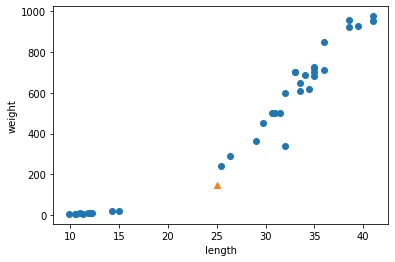

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X_train[:, 0], X_train[:, 1])
plt.scatter(25, 150, marker = '^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()
# 도미 데이터에 더 가까이 있으나 방어로 예측

In [ ]:
distances, indexes = kn.kneighbors([[25, 150]])

In [ ]:
distances

array([[ 92.00086956, 130.48375378, 130.73859415, 138.39320793,
        140.00603558]])

In [ ]:
indexes

array([[ 7, 27,  4, 18, 13]])

Text(0, 0.5, 'weight')

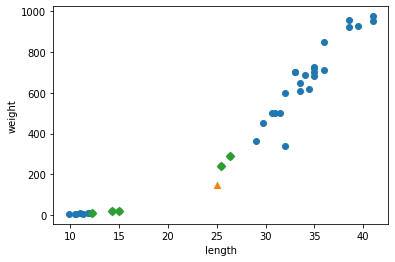

In [ ]:
plt.scatter(X_train[:, 0], X_train[:, 1])
plt.scatter(25, 150, marker = '^')
plt.scatter(X_train[indexes, 0], X_train[indexes, 1], marker = 'D')
plt.xlabel('length')
plt.ylabel('weight')

In [ ]:
print(X_train[indexes])

[[[ 25.4 242. ]
  [ 15.   19.9]
  [ 14.3  19.7]
  [ 12.2  12.2]
  [ 26.3 290. ]]]


In [ ]:
print(y_train[indexes]) 
# 타겟을살펴보면, 가장 가까운 생선 중 3개는 빙어(0) 이고, 나머지 2개는 도미(1)

[[1. 0. 0. 0. 1.]]


In [ ]:
print(distances)
# 거리가 가장 먼 것과 가까운 것 (140, 92) 둘다 도미로 예측하였다 
# 왜그럴까? 

[[ 92.00086956 130.48375378 130.73859415 138.39320793 140.00603558]]


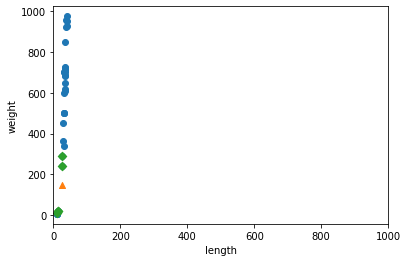

In [ ]:
# 거리를 기반으로 분류를 하는 알고리즘이기 때문에, 거리에 대한 스케일링이 되어야 한다
plt.scatter(X_train[:, 0], X_train[:, 1])
plt.scatter(25, 150, marker= '^')
plt.scatter(X_train[indexes, 0], X_train[indexes, 1], marker = 'D')
plt.xlim((0, 1000))
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# x, y 둘다 동일한 범주인 0~1000로 맞춰보니 아래와 같은 그림을 그릴 수 있음

In [ ]:
# 가장 멀리 사용하는 전처리 방법 중 하나 : 표준점수 (z 점수)
# 표준점수는 각 특성이 평균에서 표준편차의 몇 배 만큼 떨어져 있는지를 나타냄

In [ ]:
mean = np.mean(X_train, axis = 0)
std = np.std(X_train, axis = 0)

In [ ]:
print(mean, std)

[ 27.725      471.53333333] [ 10.4186898  334.32063203]


In [ ]:
train_scaled = (X_train - mean) / std

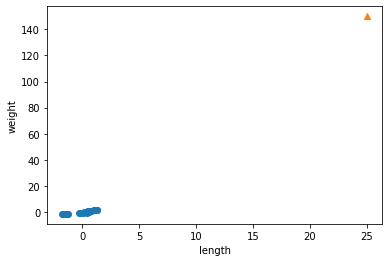

In [ ]:
# 전처리 데이터로 모델 훈련하기
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(25, 150, marker = '^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# 오른쪽 끝에 25, 150 의 점이 있음
# 해당 값은 스케일링이 반영되어있지 않기 때문에 이러한 그림이 그려짐
# 훈련세트의 mean , std 반영되어야 함

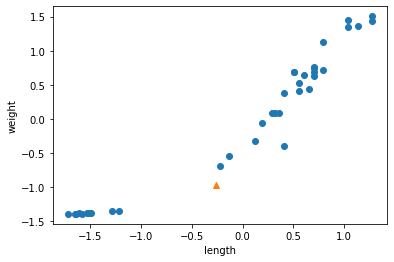

In [ ]:
new = ([25, 150] - mean) /std
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(new[0], new[1], marker = '^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# 위에 그린 그림과 유사한데, 
# x, y 축의 범위가 -1.5 ~ 1.5 사이라는 것만 좀 다르다
# 훈련 데이터의 length, weight 값이 비슷한 범위를 차지하고 있음

In [ ]:
kn.fit(train_scaled, y_train)

KNeighborsClassifier()

In [ ]:
# 훈련 후 테스트셋을 평가할 때는 훈련셋의 기준으로 테스트셋을 변환해야 
# 같은 스케일로 산점도를 그릴 수 있음

test_scaled = (X_test - mean) / std
# 이부분은 train 파일에 fit_transform() 한 뒤 test 에 .transform()  하는 것과 같다

In [ ]:
kn.score(test_scaled, y_test)

1.0

In [ ]:
print(kn.predict([new]))

[1.]


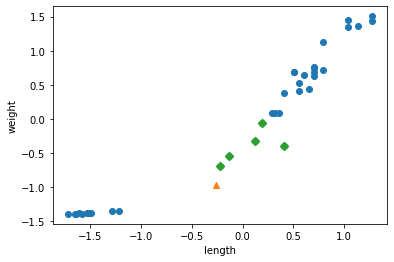

In [ ]:
distances, indexes = kn.kneighbors([new])
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(new[0], new[1], marker = '^')
plt.scatter(train_scaled[indexes,0], train_scaled[indexes,1], marker = 'D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
# 스케일이 다른 특성을 처리하고자 한다면 어떻게 하나? 
# 책에서는 mean, std 를 사용하여 표준화 처리를 하였다 
# 확인문제 
# 1. 스케일 조정 방식의 하나로 특성값을 0에서 표준편차의 몇 배수만큼 떨어져있는지 변환 : 표